In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#Misc libraries
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Money_Laundering_Dataset.csv')
df.head()

,Unnamed: 0,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,0.0,1.0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1.0,1.0,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,2.0,1.0,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,3.0,1.0,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,4.0,1.0,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [3]:
df.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      99997 non-null   float64
 1   step            99323 non-null   float64
 2   type            100000 non-null  object 
 3   amount          100000 non-null  float64
 4   nameOrig        99990 non-null   object 
 5   oldbalanceOrg   99857 non-null   float64
 6   newbalanceOrig  99978 non-null   float64
 7   nameDest        99996 non-null   object 
 8   oldbalanceDest  99948 non-null   float64
 9   newbalanceDest  100000 non-null  float64
 10  isFraud         99683 non-null   float64
 11  isFlaggedFraud  99929 non-null   float64
dtypes: float64(9), object(3)
memory usage: 9.2+ MB


In [5]:
df.duplicated().value_counts()

False    100000
dtype: int64

In [6]:
df.var()

Unnamed: 0        8.332944e+08
step              3.353611e+00
amount            1.185427e+11
oldbalanceOrg     7.155582e+12
newbalanceOrig    7.352686e+12
oldbalanceDest    5.772132e+12
newbalanceDest    7.853164e+12
isFraud           4.145907e-03
isFlaggedFraud    1.000711e-05
dtype: float64

In [7]:
df.isFlaggedFraud.value_counts()

0.0    99928
1.0        1
Name: isFlaggedFraud, dtype: int64

In [8]:
df.nameOrig.value_counts()

C1231006815    1
C15216502      1
C1106950379    1
C8596168       1
C973878224     1
              ..
C627778404     1
C409847061     1
C1718145017    1
C1411870849    1
C1868032458    1
Name: nameOrig, Length: 99990, dtype: int64

In [9]:
df.nameDest.value_counts()

C985934102     78
C1286084959    72
C248609774     71
C1590550415    69
C2083562754    66
               ..
M375566378      1
M1225444842     1
M1709995863     1
M1690970473     1
M1419201886     1
Name: nameDest, Length: 51542, dtype: int64

In [10]:
df = df.drop(['isFlaggedFraud','Unnamed: 0'], axis=1)

In [11]:
df.isna().sum() 

step              677
type                0
amount              0
nameOrig           10
oldbalanceOrg     143
newbalanceOrig     22
nameDest            4
oldbalanceDest     52
newbalanceDest      0
isFraud           317
dtype: int64

In [12]:
df2 = df.drop(['step','type','nameOrig','nameDest','isFraud'], axis=1)
df2.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,9839.64,170136.0,160296.36,0.0,0.0
1,1864.28,21249.0,19384.72,0.0,0.0
2,181.00,181.0,0.00,0.0,0.0
3,181.00,181.0,0.00,21182.0,0.0
4,11668.14,41554.0,29885.86,0.0,0.0


# Missing values Handling

In [13]:
df['step'] = df['step'].fillna(method='ffill')
df['nameOrig'] = df['nameOrig'].fillna(df['nameOrig'].mode()[0])
df['nameDest'] = df['nameDest'].fillna(df['nameDest'].mode()[0])
df['isFraud'] = df['isFraud'].fillna(df['isFraud'].mode()[0])

In [14]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
Imp_df = imp.fit_transform(df2)

In [21]:
imp_df = pd.DataFrame(Imp_df)
imp_df.columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest']
imp_df.isna().sum()

amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
dtype: int64

In [23]:
columns = imp_df.columns
df[columns] = imp_df[columns]

In [24]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1.0,PAYMENT,9839.64,C1231006815,170136.000000,160296.36,M1979787155,0.00,0.00,0.0
1,1.0,PAYMENT,1864.28,C1666544295,21249.000000,19384.72,M2044282225,0.00,0.00,0.0
2,1.0,TRANSFER,181.00,C1305486145,181.000000,0.00,C553264065,0.00,0.00,1.0
3,1.0,CASH_OUT,181.00,C840083671,181.000000,0.00,C38997010,21182.00,0.00,1.0
4,1.0,PAYMENT,11668.14,C2048537720,41554.000000,29885.86,M1230701703,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...
99995,10.0,PAYMENT,4020.66,C1410794718,434453.693383,155908.34,M1257036576,0.00,0.00,0.0
99996,10.0,PAYMENT,18345.49,C744303677,347585.043848,0.00,M1785344556,0.00,0.00,0.0
99997,10.0,CASH_IN,183774.91,C104331851,494248.801184,222947.91,C36392889,54925.05,0.00,0.0
99998,10.0,CASH_OUT,82237.17,C707662966,359750.480152,0.00,C1553004158,592635.66,799140.46,0.0


In [25]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [26]:
df.isFraud.value_counts()

0.0    99585
1.0      415
Name: isFraud, dtype: int64

## Typecasting

In [27]:
df.step = df.step.astype('int32')
df.isFraud = df.isFraud.astype('int32')

## Outlier Analysis

In [ ]:
#check outliers 
    
for i in df:
    if df[i].dtypes == np.int64 or df[i].dtypes == np.float64:
        plt.figure()
        sns.boxplot(df[i])

# EDA

In [28]:
import dtale
#import dtale.app  as dtale_app
#dtale_app.USE_NGROK=True
dtale.show(df)

In [29]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000
mean,8.499640,1.736022e+05,8.783011e+05,8.941624e+05,8.805339e+05,1.184041e+06,0.004150
std,1.825545,3.443003e+05,2.673144e+06,2.711294e+06,2.402261e+06,2.802350e+06,0.064287
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,-1.994883e+05,0.000000e+00,0.000000
25%,8.000000,9.963562e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,9.000000,5.274552e+04,2.014600e+04,0.000000e+00,2.084150e+04,4.990918e+04,0.000000
75%,10.000000,2.117631e+05,1.937498e+05,2.152297e+05,5.882942e+05,1.058186e+06,0.000000
max,10.000000,1.000000e+07,3.379739e+07,3.400874e+07,3.400874e+07,3.894623e+07,1.000000


In [13]:
df.amount.min()

0.32

In [31]:
import pandas_profiling as pp
profile = pp.ProfileReport(df)
profile.to_file("output.html")

2023-03-30 11:01:51,848 - INFO     - Pandas backend loaded 1.5.3
2023-03-30 11:01:51,898 - INFO     - Numpy backend loaded 1.23.5
2023-03-30 11:01:51,914 - INFO     - Pyspark backend NOT loaded
2023-03-30 11:01:51,914 - INFO     - Python backend loaded


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Visualization

In [32]:
pivot_table = df.pivot_table(index=['type'], values=['amount','isFraud'], aggfunc=['sum','std'])
cm = sns.light_palette('green', as_cmap=True )
pivot_table.style.background_gradient(cmap=cm)

In [33]:
#Pivot table
pivot_table = df.pivot_table(index=['type','step'], values=['amount','isFraud'], aggfunc=['sum','std'])
'''
paysim_pivot1=pd.pivot_table(df,index=["type"],
                               values=['amount','isFraud','isFlaggedFraud'],
                               aggfunc=[np.sum,np.std], margins=True)'''

#Adding color gradient 
#cm = sns.light_palette("green", as_cmap=True)
#pivot_table.style.background_gradient(cmap=cm)
cm = sns.light_palette('green', as_cmap=True )
pivot_table.style.background_gradient(cmap=cm)

In [34]:
ax = plt.hist(df.type)
ax = plt.xlabel('Type')


<AxesSubplot: >

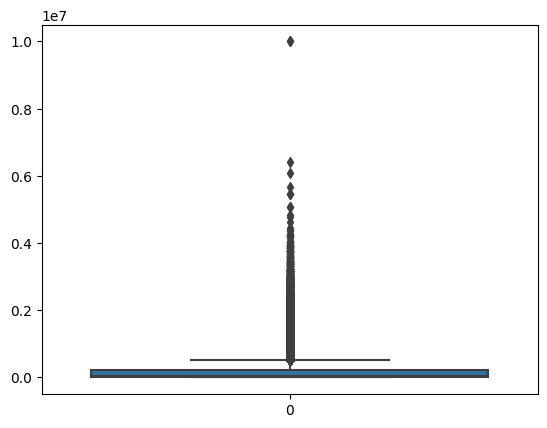

In [17]:
#Distribution of Amount
plt.figure()
sns.boxplot(df['amount'])

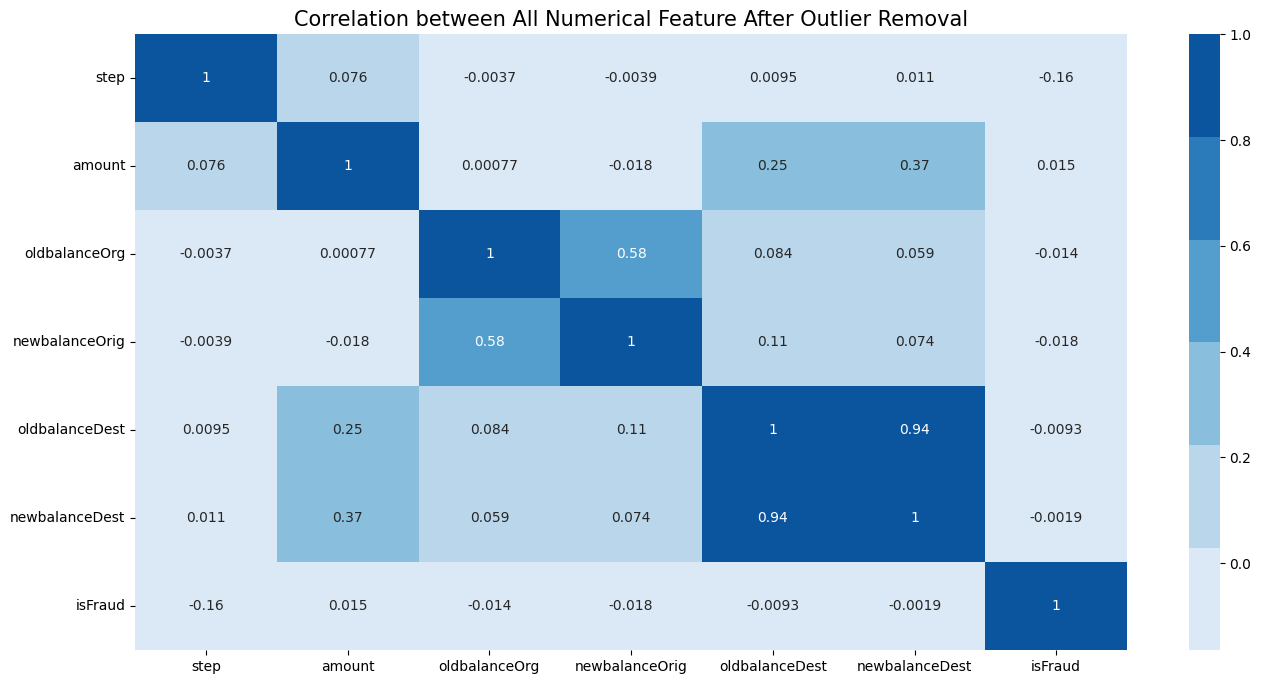

In [18]:
# create mask to cover the upper triangle of the heatmap
mask = np.triu(np.ones_like(df.corr()))
# create colormap
colormap = sns.color_palette("Blues")
 

plt.figure(figsize=(16,8))
plt.title('Correlation between All Numerical Feature After Outlier Removal', size=15)
sns.heatmap(df.corr(), annot=True, cmap=colormap)


plt.show()

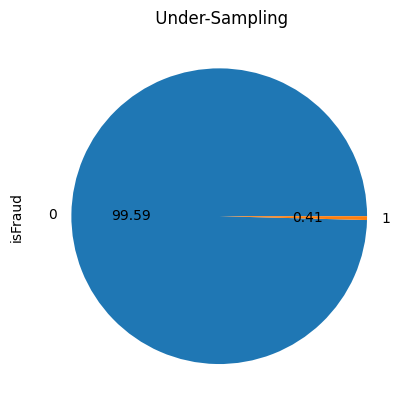

In [19]:
ax = df.isFraud.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title(' Under-Sampling')

In [20]:
df[df['amount'] > 7000000 ].count()

step              2
type              2
amount            2
nameOrig          2
oldbalanceOrg     2
newbalanceOrig    2
nameDest          2
oldbalanceDest    2
newbalanceDest    2
isFraud           2
dtype: int64

# Feature Engineering

In [35]:
#Tallying the balance
def balance_diff(data):
    '''balance_diff checks whether the money debited from sender has exactly credited to the receiver
       then it creates a new column which indicates 1 when there is a deviation else 0'''
    #Sender's balance
    orig_change=data['newbalanceOrig']-data['oldbalanceOrg']
    orig_change=orig_change.astype(int)
    for i in orig_change:
        if i<0:
            data['orig_txn_diff']=round(data['amount']+orig_change,2)
        else:
            data['orig_txn_diff']=round(data['amount']-orig_change,2)
    data['orig_txn_diff']=data['orig_txn_diff'].astype(int)
    data['orig_diff'] = [1 if n !=0 else 0 for n in data['orig_txn_diff']]

    #Receiver's balance
    dest_change=data['newbalanceDest']-data['oldbalanceDest']
    dest_change=dest_change.astype(int)
    for i in dest_change:
        if i<0:
            data['dest_txn_diff']=round(data['amount']+dest_change,2)
        else:
            data['dest_txn_diff']=round(data['amount']-dest_change,2)
    data['dest_txn_diff']=data['dest_txn_diff'].astype(int)
    data['dest_diff'] = [1 if n !=0 else 0 for n in data['dest_txn_diff']] 
    
    data.drop(['orig_txn_diff','dest_txn_diff'],axis=1,inplace = True)
    return 0

#Surge indicator
def surge_indicator(data):
    '''Creates a new column which has 1 if the transaction amount is greater than the threshold
    else it will be 0'''
    data['isFlaggedFraud']=[1 if n>200000 else 0 for n in data['amount']]

#Frequency indicator
def frequency_receiver(data):
    '''Creates a new column which has 1 if the receiver receives money from many individuals
    else it will be 0'''
    data['freq_Dest']=data['nameDest'].map(data['nameDest'].value_counts())
    data['freq_dest']=[1 if n>20 else 0 for n in data['freq_Dest']]
    
    data.drop(['freq_Dest'],axis=1,inplace = True)

#Tracking the receiver as merchant or not
def merchant(data):
    '''We also have customer ids which starts with M in Receiver name, it indicates merchant
    this function will flag if there is a merchant in receiver end '''
    values = ['M']
    conditions = list(map(data['nameDest'].str.contains, values))
    data['merchant'] = np.select(conditions, '1', '0')


In [ ]:
#Applying balance_diff function
balance_diff(df)

df['orig_diff'].value_counts()
df['dest_diff'].value_counts()

In [36]:
#Applying surge_indicator function
surge_indicator(df)
df['isFlaggedFraud'].value_counts()

0    73552
1    26448
Name: isFlaggedFraud, dtype: int64

In [42]:
#Applying frequency_receiver function
frequency_receiver(df)
df['freq_dest'].value_counts()

0    92744
1     7256
Name: freq_dest, dtype: int64

## Dummy variable creation

In [ ]:
df=pd.concat([df,pd.get_dummies(df['type'], prefix='type_')],axis=1)
df.drop(['type'],axis=1,inplace = True)
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,freq_dest,type__CASH_IN,type__CASH_OUT,type__DEBIT,type__PAYMENT,type__TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,0,0,0,0,0,0,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,0,0,0,1,0,0,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,0,1,0


2023-03-30 12:01:17,676 - INFO     - Executing shutdown due to inactivity...
2023-03-30 12:01:30,042 - INFO     - Executing shutdown...
2023-03-30 12:01:30,058 - ERROR    - Exception on /shutdown [GET]
Traceback (most recent call last):
  File "c:\Users\abdul\AppData\Local\Programs\Python\Python310\lib\site-packages\flask\app.py", line 2528, in wsgi_app
    response = self.full_dispatch_request()
  File "c:\Users\abdul\AppData\Local\Programs\Python\Python310\lib\site-packages\flask\app.py", line 1825, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "c:\Users\abdul\AppData\Local\Programs\Python\Python310\lib\site-packages\flask\app.py", line 1823, in full_dispatch_request
    rv = self.dispatch_request()
  File "c:\Users\abdul\AppData\Local\Programs\Python\Python310\lib\site-packages\flask\app.py", line 1799, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "c:\Users\abdul\AppData\Local\Programs\Python\Python3

In [22]:
df = df.drop(['nameOrig','nameDest'], axis=1)

# Balancing Data

In [23]:
X = df
Y = Y

##### UnderSampling

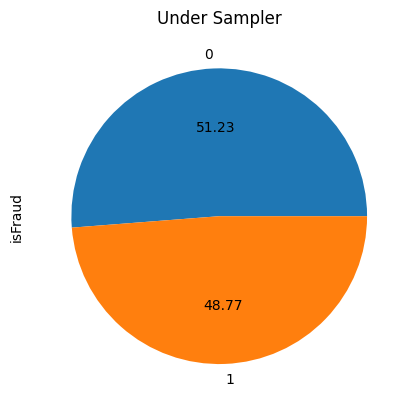

In [47]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=0.95)
x_res,y_res = rus.fit_resample(X, Y)

under_sample_df = pd.concat([pd.DataFrame(x_res), pd.DataFrame(y_res)], axis=1)

ax = y_res.value_counts().plot.pie(autopct = '%.2f')
_ = ax.set_title('Under Sampler')

In [48]:
under_sample_df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,type__CASH_IN,type__CASH_OUT,type__DEBIT,type__PAYMENT,type__TRANSFER,isFraud
0,9,145258.51,430461.06,0.00,205983.00,535.01,0,0,1,0,0,0,0
1,10,3954.28,14522.00,0.00,163052.12,167006.40,0,0,1,0,0,0,0
2,9,29196.03,12002.00,0.00,0.00,0.00,0,0,0,0,1,0,0
3,8,174441.92,0.00,0.00,2740362.08,3572459.17,0,0,1,0,0,0,0
4,10,15723.22,66559.00,0.00,689354.76,705077.98,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,10,335556.78,0.00,385217.78,2322043.88,2383642.06,1,1,0,0,0,0,1
847,10,93810.76,116325.00,0.00,0.00,0.00,0,0,0,0,0,1,1
848,10,93810.76,4142.00,0.00,4096048.05,4189858.81,0,0,1,0,0,0,1
849,10,503405.88,0.00,0.00,0.00,0.00,1,0,0,0,0,1,1


In [49]:
under_sample_df.to_csv('Under_Sample_Data.csv')

##### SMOTE OverSampling

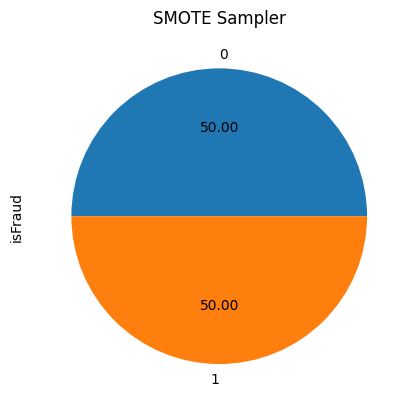

In [24]:
from imblearn.over_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
#oversampled_X, oversampled_Y = sm.fit_sample(df_train.drop('Is_Lead', axis=1), df_train['Is_Lead'])
oversampled_X, oversampled_Y = sm.fit_resample(X,Y)
oversampled_df = pd.concat([pd.DataFrame(oversampled_X), pd.DataFrame(oversampled_Y)], axis=1)

ax = oversampled_Y.value_counts().plot.pie(autopct = '%.2f')
_ = ax.set_title('SMOTE Sampler')

In [26]:
oversampled_df.to_csv('OverSampled_Data.csv')

## Normalization

In [205]:
from sklearn.preprocessing import MinMaxScaler
df2 = oversampled_df.drop(['isFraud'], axis=1)
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Apply the scaler to the dataset
normalized_df = scaler.fit_transform(df2)

# Convert the normalized data back into a pandas DataFrame
normalized_df = pd.DataFrame(normalized_df, columns=df2.columns)

In [206]:
normalized_df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,orig_diff,dest_diff,surge,freq_dest,type__CASH_IN,type__CASH_OUT,type__DEBIT,type__PAYMENT,type__TRANSFER
0,0.000000,0.000984,0.005034,0.004713,0.005832,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.000186,0.000629,0.000570,0.005832,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000000,0.000018,0.000005,0.000000,0.005832,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.000000,0.000018,0.000005,0.000000,0.006451,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.000000,0.001167,0.001230,0.000879,0.005832,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199165,0.000000,0.005372,0.000109,0.000000,0.007765,0.001659,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
199166,0.000000,0.030154,0.003405,0.003305,0.050716,0.141625,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
199167,0.111111,0.136144,0.040282,0.000000,0.005832,0.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
199168,0.111111,0.001032,0.000314,0.000009,0.005832,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Standardization

In [207]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler object
scaler = StandardScaler()

# Apply the scaler to the dataset
standardized_df = scaler.fit_transform(df2)

# Convert the standardized data back into a pandas DataFrame
standardized_df = pd.DataFrame(standardized_df, columns=df2.columns)

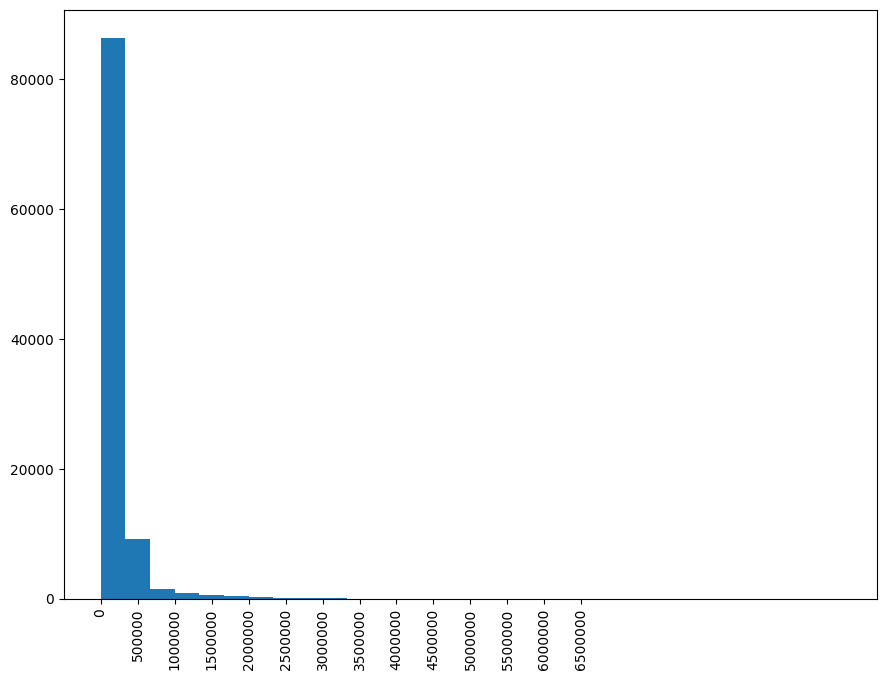

In [213]:
plt.rcParams["figure.figsize"] = [10.50,15.50]
fig = plt.figure()
plt.hist(df.amount,bins=30)
plt.xticks(np.arange(0, 7000000, step=500000),rotation=90)
#plt.yticks(np.arange(0, 4000, step=100))
plt.ticklabel_format(style='plain')
#plt.figure(figsize=(20,20))

spacing = 0.500
fig.subplots_adjust(bottom=spacing)
plt.show()

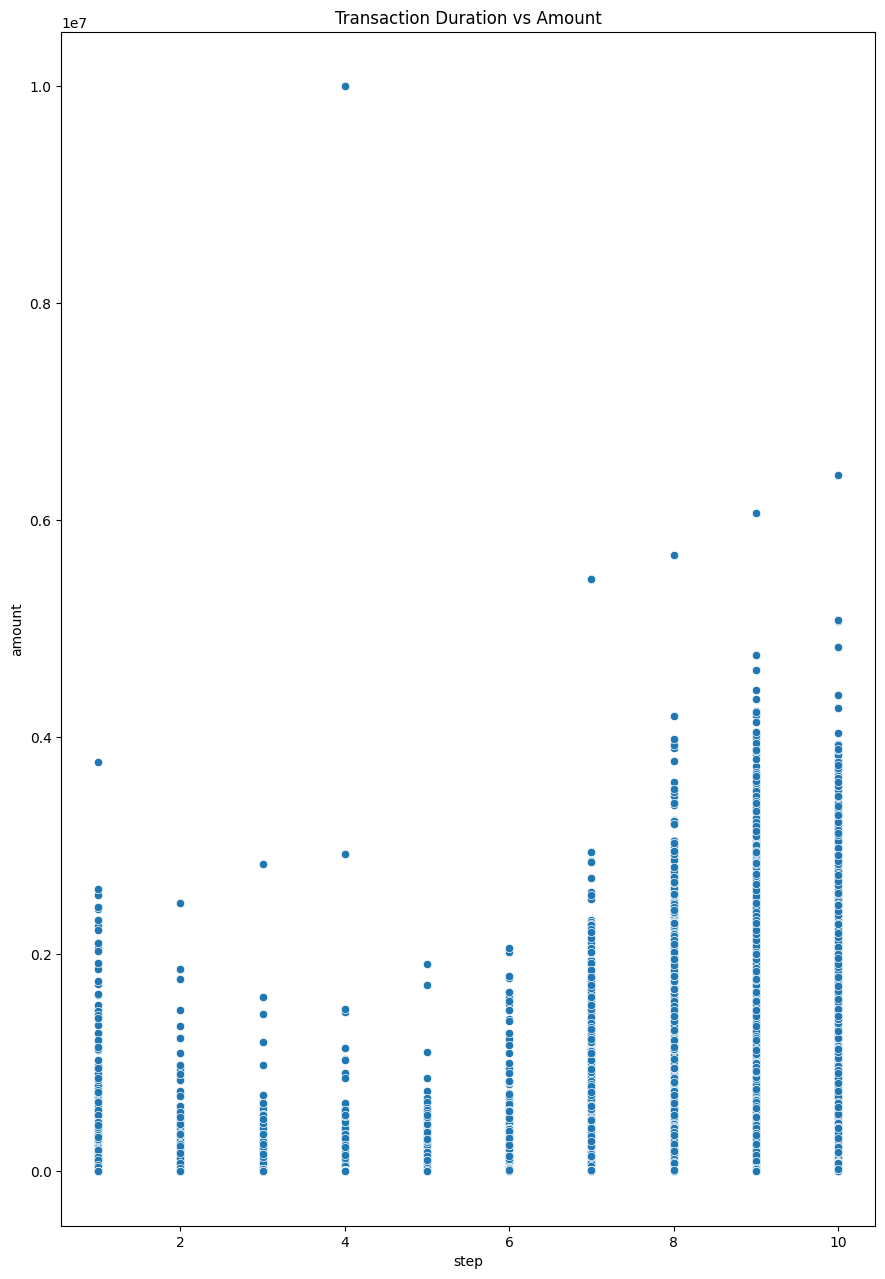

In [214]:
# scatterplot
sns.scatterplot(x='step', y='amount', data=df)
plt.title('Transaction Duration vs Amount')
plt.show()

In [215]:
#max_index = df['amount'].idxmax()

# retrieve the row with the highest score using the loc accessor
#df.loc[max_index]

In [216]:
#df = df.drop(df.index[max_index])
#df.index[max_index]

# Data Splitting

In [218]:
#In this module we create the independent and dependent feature, then split them into train and test data where training size is 70%. Later we collect all the numerical features and apply StandardScaler() function which transforms the distribution so that the mean becomes 0 and standard deviation becomes 1

#Splitting dependent and independent variable
#df3=df2.copy()
X=normalized_df
y=oversampled_df['isFraud']

# Train-test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=111)